## plot_timeheight.ipynb

Author: Robert M. Frost

University of Oklahoma

Created: 09 November 2023

Purpose: Plot timeheight series of supercell updrafts

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import xarray as xr
import pyart
import numpy as np
from matplotlib.ticker import MultipleLocator
from matplotlib.gridspec import GridSpec


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
dth = "/Users/robertfrost/Documents/boomsoon/2023_semester_2/capstone/analysis/Capstone_2023/data/timeheight_201708-053.nc"
figdir = "/Users/robertfrost/Documents/boomsoon/2023_semester_2/capstone/analysis/figures/lightning_case1/"
dtrack = "/Users/robertfrost/Documents/boomsoon/2023_semester_2/capstone/analysis/capstone_2023.nc"

In [3]:
th = xr.open_dataset(dth)
track = xr.open_dataset(dtrack)
case_meso = track.where(track.mesocyclone_id == th.mesocyclone_id, drop=True)

In [4]:
# Set the font weight for plot titles
plt.rcParams['axes.titleweight'] = 'bold'

# Set the font weight for x-axis and y-axis labels
plt.rcParams['axes.labelweight'] = 'normal'

plt.rcParams['text.latex.preamble'] = r'\usepackage{bm}'

# Other plotting setup
rc('font', family='sans-serif')
rc('font', weight='normal', size=15)
rc('figure', facecolor='white') 

In [5]:
time = th.time
z = th.z
reflectivity = th.reflectivity

In [6]:
reflectivity_threshhold = 40 # in dbz
high_reflectivity = reflectivity.where(reflectivity > reflectivity_threshhold)
updraft_depth_idx = high_reflectivity.argmin(dim="z")
updraft_depth = th.z[updraft_depth_idx]

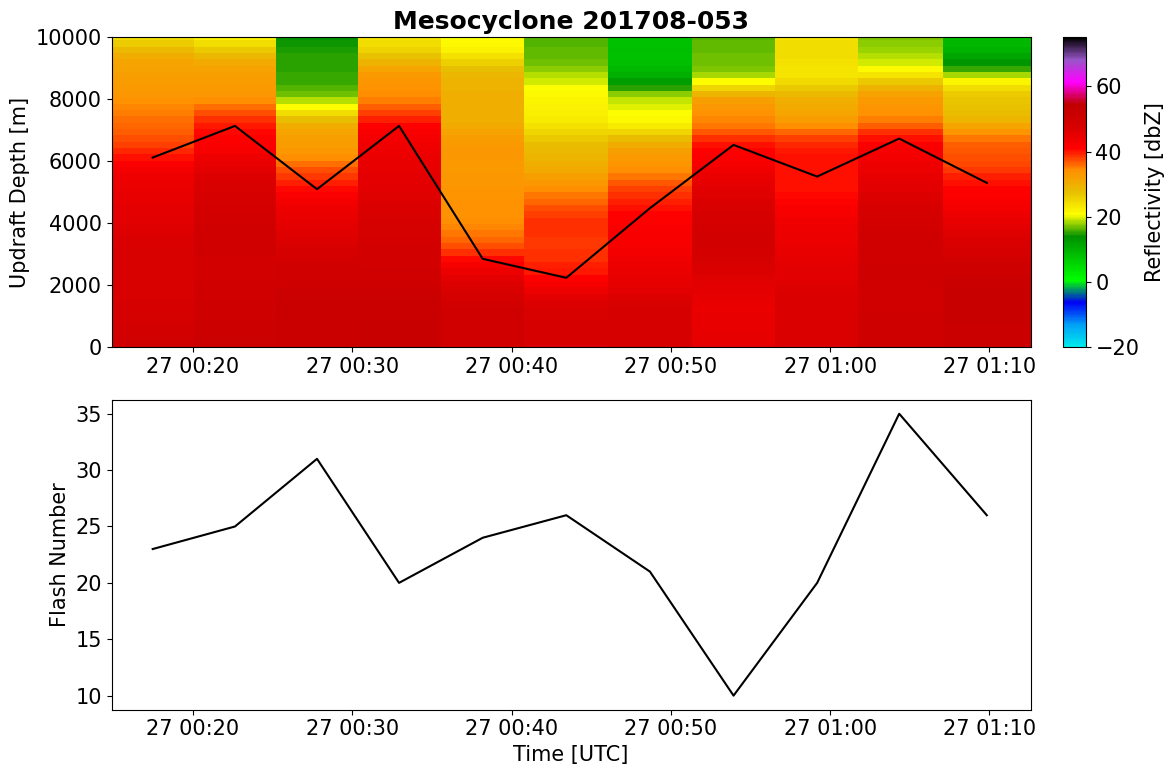

In [12]:
# Create a 2x2 grid for the subplots
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 2, width_ratios=[1, 0.025])

# wspd time height series
ax1 = plt.subplot(gs[0, 0])
cax = plt.subplot(gs[0, 1])
pcm = ax1.pcolormesh(time, z, reflectivity.T, cmap="pyart_NWSRef", vmin=-20, vmax=75)
plt.colorbar(pcm, cax=cax, label='Reflectivity [dbZ]')
ax1.plot(time, updraft_depth, c="black", lw=1.5)
ax1.set_ylabel("Updraft Depth [m]")

ax1.set_title(f"Mesocyclone {th.mesocyclone_id}")
ax1.set_ylim(0,10000)

# time series of wspd at 425 m
ax2 = plt.subplot(gs[1, 0], sharex=ax1)
ax2.plot(time, case_meso.flash_number, c="black", lw=1.5)
ax2.set_ylabel("Flash Number")
ax2.set_xlabel("Time [UTC]")

plt.tight_layout()
plt.show()